# **Penggunaan Fuzzy Inference System untuk Memprediksi Resiko Penyakit Diabetes**

Dikerjakan oleh:
* Dyan Maharani Az Zahra - 103052300081
* Diana Kartika Intan Pratiwi - 103052330031
* Muhammad Abil Hasan - 103052330034

# **Pendahuluan dan Pemaparan Data**

## **Pendahuluan**

Prediksi risiko penyakit, khususnya diabetes, sangat penting untuk pencegahan dini. Diabetes berdampak besar pada kualitas hidup dan sistem kesehatan global. Oleh karena itu, dibutuhkan metode yang akurat untuk mendeteksi risiko sejak awal.

Data medis sering kali mengandung ketidakpastian, sehingga sulit ditangani dengan pendekatan konvensional. Logika fuzzy menawarkan solusi dengan menangkap ketidakpastian data dan memberikan interpretasi linguistik yang mudah dipahami.

Penelitian ini menggunakan sistem fuzzy untuk memprediksi risiko diabetes berdasarkan kadar glukosa darah dan BMI. Dengan metode Mamdani dan Sugeno, sistem ini diharapkan menghasilkan hasil yang konsisten. Selain itu, penelitian ini juga bertujuan untuk membandingkan kelebihan dan kekurangan metode Mamdani dan Sugeno dalam mendeteksi risiko diabetes.

## **Masalah yang Ingin Diselesaikan**
Peningkatan jumlah penderita diabetes membutuhkan deteksi dini yang efektif. Ketidakpastian dalam data medis menjadi tantangan utama yang memerlukan pendekatan seperti logika fuzzy. Penelitian ini bertujuan membantu deteksi risiko diabetes secara lebih akurat, mendukung pengambilan keputusan bagi tenaga medis maupun sistem otomatis, serta membandingkan performa metode Mamdani dan Sugeno untuk mendapatkan solusi terbaik.

## **Dataset yang Digunakan**
Dataset yang digunakan dalam analisis ini bernama "Diabetes prediction dataset" yang diunggah oleh pengguna bernama @kevintan701 di website bernama kaggle.com. Dataset ini mencakup berbagai parameter kesehatan seperti blood_glucose, bmi, dan faktor lainnya yang berkontribusi pada risiko diabetes. Dalam studi ini, kami menggunakan sistem inferensi fuzzy untuk memprediksi risiko diabetes berdasarkan kadar glukosa darah dan Body Mass Index (BMI).

Dataset yang digunakan dalam penelitian ini mencakup parameter-parameter kesehatan yang relevan untuk prediksi risiko diabetes. Data tersebut meliputi kadar glukosa darah (blood glucose), indeks massa tubuh (BMI), tekanan darah, ketebalan kulit (skin thickness), tingkat insulin, dan usia. Dataset ini bersumber dari platform terpercaya, yang dirancang khusus untuk mendukung analisis prediktif risiko diabetes. Dengan kombinasi parameter tersebut, sistem fuzzy dapat mengolah data secara efektif untuk menghasilkan prediksi risiko yang akurat.

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load dataset
dataset_path = '/kaggle/input/diabetes-prediction-datasets/diabetes_data.csv'
data = pd.read_csv(dataset_path)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


## **Statistik Data**
Dataset yang digunakan memiliki 9 kolom dan 1000 baris. Berikut adalah 9 variabel beserta jenis variabel yang ada dalam dataset:
* Pregnancies (Numerik): Jumlah kehamilan (hanya relevan untuk pasien perempuan).
* Glucose (Numerik): Kadar glukosa darah (mg/dL) setelah 2 jam dalam tes toleransi glukosa.
* BloodPressure (Numerik): Tekanan darah diastolik (mm Hg).
* SkinThickness (Numerik): Ketebalan lipatan kulit (mm).
* Insulin (Numerik): Tingkat insulin serum 2 jam (μU/mL).
* BMI (Numerik): Indeks Massa Tubuh (kg/m²).
* DiabetesPedigreeFunction (Numerik): Fungsi riwayat keluarga untuk risiko diabetes.
* Age (Numerik): Usia pasien (tahun).
* Outcome (Kategorikal) : (0 = Tidak, 1 = Ya)

Statistik awal untuk variabel utama:
* **Glukosa darah**: Rentang nilai dari 0 hingga 200.
* **BMI**: Rentang nilai dari 0 hingga 50.

## **Pre-processing Data**
Tidak ada nilai kosong pada dataset ini. Semua data digunakan langsung untuk analisis tanpa normalisasi tambahan.


# **Metode dan Eksperimen**

## **Sistem Inferensi Fuzzy**
Sistem inferensi fuzzy yang digunakan dalam penelitian ini terdiri dari beberapa tahapan utama, yaitu:

1. Fuzzifikasi
Pada tahap ini, data crisp (nilai nyata) seperti kadar glukosa darah dan BMI dikonversi menjadi nilai fuzzy berdasarkan fungsi keanggotaan yang telah didefinisikan. Fungsi keanggotaan yang digunakan dalam penelitian ini adalah fungsi trapezoidal, yang dirancang untuk mencerminkan kategori linguistik seperti "Low", "Medium", dan "High".

2. Penerapan Aturan Fuzzy
Sistem inferensi fuzzy menggunakan aturan berbasis logika linguistik untuk menghubungkan input fuzzy dengan output fuzzy. Aturan ini dirancang berdasarkan kombinasi kategori input, misalnya:

    a. Jika glukosa darah "High", maka risiko diabetes "High".

   
    b. Jika glukosa darah "Low", dan BMI "Underweight", maka risiko diabetes "Low".


    c. Jika glukosa darah "Low", dan BMI "Normal", maka risiko diabetes "Low".


    d. Jika glukosa darah "Low", dan BMI "Overweight", maka risiko diabetes "Medium".


    e. Jika glukosa darah "Low", dan BMI "Obese", maka risiko diabetes "Medium".


    f. Jika glukosa darah "Medium", dan BMI "Underweight", maka risiko diabetes "Medium".


    g. Jika glukosa darah "Medium", dan BMI "Normal", maka risiko diabetes "Medium".


    h. Jika glukosa darah "Medium", dan BMI "Overweight", maka risiko diabetes "High".


    i. Jika glukosa darah "Medium", dan BMI "Obese", maka risiko diabetes "High".

4. Agregasi Output Fuzzy
Output fuzzy dari setiap aturan digabungkan menggunakan operator logika seperti "min" untuk kekuatan aturan dan "max" untuk penggabungan aturan. Proses ini menghasilkan satu set nilai fuzzy untuk risiko diabetes.

5. Defuzzifikasi
Output fuzzy dikonversi kembali menjadi nilai crisp (numerik) untuk memberikan prediksi akhir risiko diabetes. Dalam penelitian ini, metode Mamdani dan Sugeno digunakan untuk menghitung nilai crisp dari output fuzzy.

Eksperimen dilakukan dengan membandingkan dua pendekatan utama dalam sistem inferensi fuzzy, yaitu metode Mamdani dan Sugeno. Hasil dari masing-masing metode dianalisis untuk mengevaluasi kelebihan dan kekurangan dalam mendeteksi risiko diabetes.

## **Variabel Linguistik dan Fungsi Keanggotaan**

In [2]:
def fuzzy_membership(value, ranges):
    """
    Hitung derajat keanggotaan fuzzy berdasarkan rentang trapezoidal.
    """
    memberships = {}
    for label, (a, b, c, d) in ranges:
        if a < value < b:
            memberships[label] = (value - a) / (b - a)
        elif b <= value <= c:
            memberships[label] = 1
        elif c < value <= d:
            memberships[label] = (d - value) / (d - c)
        else:
            memberships[label] = 0
    return memberships

#### Glukosa Darah
* Low: [0, 0, 100, 130]
* Medium: [100, 130, 160, 190]
* High: [160, 190, 297, 297]

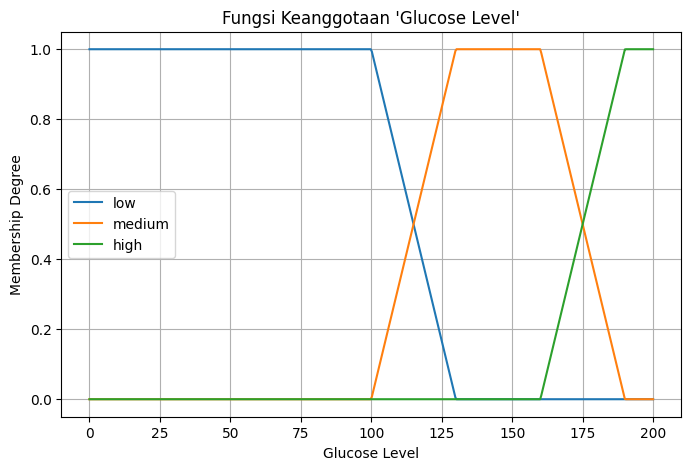

In [3]:
glucose_ranges = [
    ("low", (0, 0, 100, 130)),
    ("medium", (100, 130, 160, 190)),
    ("high", (160, 190, 297, 297))
]


def plot_glucose_membership(glucose_ranges):
    x = np.linspace(0, 200, 500)
    plt.figure(figsize=(8, 5))
    for label, (a, b, c, d) in glucose_ranges:
        y = [fuzzy_membership(val, [(label, (a, b, c, d))])[label] for val in x]
        plt.plot(x, y, label=label)
    plt.title("Fungsi Keanggotaan 'Glucose Level'")
    plt.xlabel("Glucose Level")
    plt.ylabel("Membership Degree")
    plt.legend()
    plt.grid()
    plt.show()

plot_glucose_membership(glucose_ranges) 

#### BMI
* Underweight: [0, 0, 18,5, 20]
* Normal: [18.5, 22, 25, 30]
* Overweight: [25, 30, 35, 40]
* Obese: [35, 40, 45.2, 45.2]

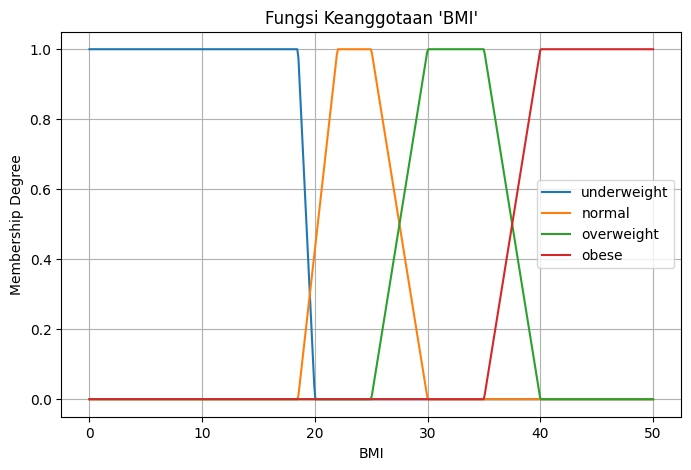

In [4]:
bmi_ranges = [
    ("underweight", (0, 0, 18.5, 20)),
    ("normal", (18.5, 22, 25, 30)),
    ("overweight", (25, 30, 35, 40)),
    ("obese", (35, 40, 50, 50))
]

def plot_bmi_membership(bmi_ranges):
    x = np.linspace(0, 50, 500)
    plt.figure(figsize=(8, 5))
    for label, (a, b, c, d) in bmi_ranges:
        y = [fuzzy_membership(val, [(label, (a, b, c, d))])[label] for val in x]
        plt.plot(x, y, label=label)
    plt.title("Fungsi Keanggotaan 'BMI'")
    plt.xlabel("BMI")
    plt.ylabel("Membership Degree")
    plt.legend()
    plt.grid()
    plt.show()

plot_bmi_membership(bmi_ranges)

#### Risiko Diabetes (Output)
* Low: [0, 0, 20, 30]
* Medium: [20, 30, 50, 60]
* High: [50, 60, 100, 100]

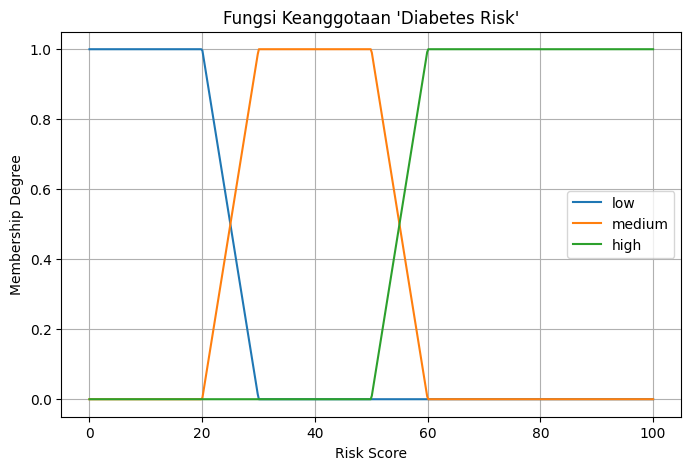

In [5]:
diabetes_risk_ranges = [
    ("low", (0, 0, 20, 30)),
    ("medium", (20, 30, 50, 60)),
    ("high", (50, 60, 100, 100))
]

def plot_diabetes_risk_membership(diabetes_risk_ranges):
    x = np.linspace(0, 100, 500)
    plt.figure(figsize=(8, 5))
    for label, (a, b, c, d) in diabetes_risk_ranges:
        y = [fuzzy_membership(val, [(label, (a, b, c, d))])[label] for val in x]
        plt.plot(x, y, label=label)
    plt.title("Fungsi Keanggotaan 'Diabetes Risk'")
    plt.xlabel("Risk Score")
    plt.ylabel("Membership Degree")
    plt.legend()
    plt.grid()
    plt.show()

plot_diabetes_risk_membership(diabetes_risk_ranges)

In [6]:
# **Tabel Aturan Fuzzy**
from tabulate import tabulate

isi = [
    ["Low", "Low Risk", "Low Risk", "Medium Risk", "Medium Risk"],
    ["Medium", "Medium Risk", "Medium Risk", "High Risk", "High Risk"],
    ["High", "High Risk", "High Risk", "High Risk", "High Risk"]
]
headers = ["Glucose\\BMI", "Underweight", "Normal", "Overweight", "Obese"]

print(tabulate(isi, headers, tablefmt='grid'))

+---------------+---------------+-------------+--------------+-------------+
| Glucose\BMI   | Underweight   | Normal      | Overweight   | Obese       |
+===============+===============+=============+==============+=============+
| Low           | Low Risk      | Low Risk    | Medium Risk  | Medium Risk |
+---------------+---------------+-------------+--------------+-------------+
| Medium        | Medium Risk   | Medium Risk | High Risk    | High Risk   |
+---------------+---------------+-------------+--------------+-------------+
| High          | High Risk     | High Risk   | High Risk    | High Risk   |
+---------------+---------------+-------------+--------------+-------------+


In [7]:
# Function untuk mengkategorikan fuzzy risk level dari dataset asli
def determine_fuzzy_risk(risk_score):
    memberships = fuzzy_membership(risk_score, diabetes_risk_ranges)
    return max(memberships, key=memberships.get)

def categorize_risk(row):
    risk_score = row["risk_score"]
    return determine_fuzzy_risk(risk_score)

# Apply categorization function to the dataset
data["category_risk"] = data.apply(categorize_risk, axis=1)
print(tabulate(data.head(), headers='keys', tablefmt='grid'))

+----+-----------+------------+----------+----------+-----------------+---------------------+--------+------------------------+----------------+---------------+-------------------+-------+--------------+-----------------+
|    |   user_id | date       |   weight |   height |   blood_glucose |   physical_activity |   diet |   medication_adherence |   stress_level |   sleep_hours |   hydration_level |   bmi |   risk_score | category_risk   |
+====+===========+============+==========+==========+=================+=====================+========+========================+================+===============+===================+=======+==============+=================+
|  0 |         1 | 2021-01-01 |  77.4507 |  183.994 |         112.993 |              0      |      1 |                      0 |              1 |       6.34232 |                 1 |  22.9 |     38       | medium          |
+----+-----------+------------+----------+----------+-----------------+---------------------+--------+----------

## **Eksperimen**
Eksperimen dilakukan dengan menggunakan dataset untuk menguji sistem inferensi fuzzy berdasarkan dua metode utama, yaitu Mamdani dan Sugeno. Setiap data dalam dataset diproses melalui tahapan berikut:

1. Fuzzifikasi Data Input
Nilai glukosa darah dan BMI dari dataset dikonversi menjadi nilai fuzzy menggunakan fungsi keanggotaan yang telah ditentukan.

2. Penerapan Aturan dan Inferensi
Aturan fuzzy diterapkan untuk menghubungkan input fuzzy dengan output fuzzy sesuai dengan kombinasi kategori linguistik yang relevan.

3. Defuzzifikasi
Untuk metode Mamdani, output fuzzy hasil agregasi dikonversi menjadi nilai crisp menggunakan metode centroid. Untuk metode Sugeno, output dihitung langsung berdasarkan rata-rata berbobot.



### **Metode Mamdani**

In [8]:
def mamdani_fuzzy_rules(glucose_level, bmi_level):
    # Fuzzify inputs
    glucose_membership = fuzzy_membership(glucose_level, glucose_ranges)
    bmi_membership = fuzzy_membership(bmi_level, bmi_ranges)

    # Apply fuzzy rules
    risk_scores = {
        "low": max(min(glucose_membership["low"], bmi_membership["underweight"]),
                   min(glucose_membership["low"], bmi_membership["normal"])),
        "medium": max(min(glucose_membership["low"], bmi_membership["overweight"]),
                      min(glucose_membership["low"], bmi_membership["obese"]),
                      min(glucose_membership["medium"], bmi_membership["underweight"]),
                      min(glucose_membership["medium"], bmi_membership["normal"])),
        "high": max(min(glucose_membership["medium"], bmi_membership["overweight"]),
                    min(glucose_membership["medium"], bmi_membership["obese"]),
                    min(glucose_membership["high"], bmi_membership["underweight"]),
                    min(glucose_membership["high"], bmi_membership["normal"]),
                    min(glucose_membership["high"], bmi_membership["overweight"]),
                    min(glucose_membership["high"], bmi_membership["obese"]))
    }
    risk_label = max(risk_scores, key=risk_scores.get)
    return risk_label, risk_scores 
    
# Defuzzification
def defuzzify(risk_scores):
    risk_range = np.linspace(0, 100, 100)  # Crisp output range
    # risk_range = {10, 20, 30, 40, 50, 60, 70, 80, 90, 100}
    numerator = 0
    denominator = 0

    # # Calculate centroid
    for x in risk_range:
        total_membership = 0
        for risk_label, membership_value in risk_scores.items():
            fuzzy_membership_value = fuzzy_membership(x, diabetes_risk_ranges)[risk_label]
            total_membership += min(membership_value, fuzzy_membership_value)
        numerator += x * total_membership
        denominator += total_membership
    if denominator == 0:
        return 0
    risk_score = numerator / denominator if denominator != 0 else 0	

    return risk_score

# Perform analysis on the dataset
def perform_analysis(data_mamdani):
    data_mamdani["Risk_(Crisp)"] = 0
    data_mamdani["Risk_Score_wFuzzy"] = 0
    data_mamdani["Class_wFuzzy"] = ""
    for index, row in data.iterrows():
        glucose_level = row["blood_glucose"]
        bmi_level = row["bmi"]

        # Fuzzification and inference
        risk_label, risk_scores = mamdani_fuzzy_rules(glucose_level, bmi_level)

        # Defuzzification
        risk_value = defuzzify(risk_scores)

        # Append results
        data_mamdani["Risk_(Crisp)"][index] = risk_scores
        data_mamdani["Risk_Score_wFuzzy"][index] = risk_value
        data_mamdani["Class_wFuzzy"][index] = risk_label
        

    # Save results to a new CSV file
    # results_df = pd.DataFrame(results)
    data_mamdani.to_csv("diabetes_risk_analysis_with_mamdani.csv", index=False)
    print("Analysis complete. Results saved to 'diabetes_risk_analysis_with_mamdani.csv'.")

# Run the analysis
data_mamdani = data.copy()
perform_analysis(data_mamdani)
print(tabulate(data_mamdani.head(), headers='keys', tablefmt='grid'))

Analysis complete. Results saved to 'diabetes_risk_analysis_with_mamdani.csv'.
+----+-----------+------------+----------+----------+-----------------+---------------------+--------+------------------------+----------------+---------------+-------------------+-------+--------------+-----------------+----------------------------------------------------------------------------------------+---------------------+----------------+
|    |   user_id | date       |   weight |   height |   blood_glucose |   physical_activity |   diet |   medication_adherence |   stress_level |   sleep_hours |   hydration_level |   bmi |   risk_score | category_risk   | Risk_(Crisp)                                                                           |   Risk_Score_wFuzzy | Class_wFuzzy   |
+====+===========+============+==========+==========+=================+=====================+========+========================+================+===============+===================+=======+==============+=================+

In [ ]:
data_mamdani['iscorrect'] = data_mamdani['category_risk'] == data_mamdani['Class_wFuzzy']
jumlah_benar = data_mamdani['iscorrect'].sum()

total_data = len(data_mamdani)
akurasi = (jumlah_benar / total_data) * 100

print(f"Akurasi Mamdani: {akurasi:.2f}%")
print(f"Jumlah benar: {jumlah_benar}")
print(f"Jumlah salah: {total_data-jumlah_benar}")

### **Metode Sugeno**

In [17]:
# Define Sugeno rules
def sugeno_rules(glucose_membership, bmi_membership):
    rules = {
        "low": max((min(glucose_membership["low"], bmi_membership["underweight"])), 
                   (min(glucose_membership["low"], bmi_membership["normal"]))),
        "medium": max((min(glucose_membership["low"], bmi_membership["overweight"])),
                      (min(glucose_membership["low"], bmi_membership["obese"])),
                      (min(glucose_membership["medium"], bmi_membership["underweight"])),
                      (min(glucose_membership["medium"], bmi_membership["normal"]))),
        "high": max((min(glucose_membership["medium"], bmi_membership["overweight"])),
                    (min(glucose_membership["medium"], bmi_membership["obese"])),
                    (min(glucose_membership["high"], bmi_membership["underweight"])),
                    (min(glucose_membership["high"], bmi_membership["normal"])),
                    (min(glucose_membership["high"], bmi_membership["overweight"])),
                    (min(glucose_membership["high"], bmi_membership["obese"])))
    }
    numerator = rules["low"]*33 + rules["medium"]*66 + rules["high"]*100 
    denominator = sum(rules.values())
    risk_score = numerator / denominator if denominator != 0 else 0
    return risk_score, rules

# Perform analysis on the dataset
def perform_analysis(data_sugeno):
    data_sugeno["Fuzzification_1"] = 0
    data_sugeno["Fuzzification_2"] = 0
    data_sugeno["Inference"] = 0
    data_sugeno["Risk_score_wFuzzy"] = 0
    data_sugeno["Class_wFuzzy"] = ""
    for index, row in data_sugeno.iterrows():
        blood_glucose = row['blood_glucose']
        bmi = row['bmi']
    
        # Fuzzification
        glucose_membership = fuzzy_membership(blood_glucose, glucose_ranges)
        bmi_membership = fuzzy_membership(bmi, bmi_ranges)
    
                # Sugeno inference and defuzzification
        risk_score, rules = sugeno_rules(glucose_membership, bmi_membership)
    
        # Append results
        risk_label = max(rules, key=rules.get)
        data_sugeno["Fuzzification_1"][index] = glucose_membership
        data_sugeno["Fuzzification_2"][index] = bmi_membership
        data_sugeno["Inference"][index] = rules
        data_sugeno["Risk_score_wFuzzy"][index] = risk_score
        data_sugeno["Class_wFuzzy"][index] = risk_label
    
    # Save results to CSV
    data_sugeno.to_csv("diabetes_risk_analysis_with_sugeno.csv", index=False)
    print("Analysis complete. Results saved to 'diabetes_risk_analysis_with_sugeno.csv'.")

data_sugeno = data.copy()
perform_analysis(data_sugeno)
print(tabulate(data_sugeno.head(), headers='keys', tablefmt='grid'))

Analysis complete. Results saved to 'diabetes_risk_analysis_with_sugeno.csv'.
+----+-----------+------------+----------+----------+-----------------+---------------------+--------+------------------------+----------------+---------------+-------------------+-------+--------------+-----------------+-----------------------------------------------------------------------+------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------+---------------------+----------------+
|    |   user_id | date       |   weight |   height |   blood_glucose |   physical_activity |   diet |   medication_adherence |   stress_level |   sleep_hours |   hydration_level |   bmi |   risk_score | category_risk   | Fuzzification_1                                                       | Fuzzification_2                                                                                | Inference   

In [18]:
data_sugeno['iscorrect'] = data_sugeno['category_risk'] == data_sugeno['Class_wFuzzy']
jumlah_benar = data_sugeno['iscorrect'].sum()

total_data = len(data_sugeno)
akurasi = (jumlah_benar / total_data) * 100

print(f"Akurasi Sugeno: {akurasi:.2f}%")
print(f"Jumlah benar: {jumlah_benar}")
print(f"Jumlah salah: {total_data-jumlah_benar}")

Akurasi Sugeno: 43.70%
Jumlah benar: 437
Jumlah salah: 563


# **Hasil dan Analisis**

## **Hasil Linguistik**
Berikut adalah hasil keanggotaan fuzzy untuk setiap variabel:
- **Glukosa Darah**: Low, Medium, High
- **BMI**: Underweight, Normal, Overweight, Obsese

## **Fungsi Keanggotaan**
Fungsi keanggotaan dirancang menggunakan metode **trapezoidal** untuk setiap variabel linguistik.

## **Batas Nilai Linguistik**
- Glukosa Darah: [0-200]
- BMI: [0-50]

## **Analisis Hasil**
Hasil eksperimen menunjukkan bahwa:

- Metode Sugeno unggul dalam hal efisiensi komputasi. Dengan menghasilkan output numerik langsung, metode ini cocok untuk sistem otomatisasi yang memerlukan keputusan cepat.

- Metode Mamdani lebih unggul dalam interpretasi linguistik. Hal ini membuatnya lebih cocok untuk digunakan oleh tenaga medis yang membutuhkan hasil yang mudah dipahami secara intuitif.

- Kedua metode menunjukkan tingkat akurasi yang serupa dalam mendeteksi risiko diabetes, namun efisiensi waktu pemrosesan menjadi faktor pembeda utama.

# **Kesimpulan**

Hasil eksperimen menunjukkan bahwa:
Sistem inferensi fuzzy dengan metode Mamdani dan Sugeno berhasil menangkap ketidakpastian dalam data medis untuk mendeteksi risiko diabetes. Metode Sugeno lebih efisien dan cocok untuk aplikasi berbasis numerik yang membutuhkan respons cepat. Sebaliknya, metode Mamdani lebih bermanfaat dalam konteks interpretasi manual karena memberikan hasil yang intuitif. Pemilihan metode yang digunakan bergantung pada kebutuhan spesifik aplikasi, apakah memprioritaskan efisiensi atau interpretabilitas.

Dalam model kita, lebih baik menggunakan metode Mamdani karena alasan berikut:
1. Konteks Medis Membutuhkan Transparansi dan Interpretasi yang Mudah
Metode Mamdani menghasilkan output berbasis fuzzy linguistik seperti "Low," "Medium," atau "High," yang sangat berguna dalam konteks medis. Hal ini mempermudah tenaga medis dan pasien untuk memahami hasil analisis risiko diabetes tanpa perlu terlibat dalam angka teknis yang kompleks.

2. Relevan untuk Analisis yang Tidak Membutuhkan Respons Real-Time
Efisiensi waktu bukanlah prioritas utama dalam model ini, karena tujuan utamanya adalah menghasilkan analisis risiko yang akurat dan dapat dijelaskan. Oleh karena itu, meskipun metode Sugeno lebih cepat, metode Mamdani tetap lebih sesuai untuk kebutuhan interpretasi hasil.


/** ============================================================================================ **/